In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [384]:
df = pd.read_csv('alzheimer.csv')

In [385]:
df.head(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [386]:
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [387]:
df.shape

(373, 10)

In [388]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [389]:
df.isna().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [390]:
null_num_columns = ['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF']

for col in null_num_columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [391]:
df.isna().sum()

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [392]:
df.dtypes

Group     object
M/F       object
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object

In [393]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Group'] = labelencoder.fit_transform(df['Group'])
df['M/F'] = labelencoder.fit_transform(df['M/F'])

In [394]:
df.dtypes

Group      int64
M/F        int64
Age        int64
EDUC       int64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
dtype: object

In [395]:
df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

In [396]:
features = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF']

In [397]:
df['Group'].unique()  #['Nondemented', 'Demented', 'Converted']

array([2, 1, 0])

<Axes: >

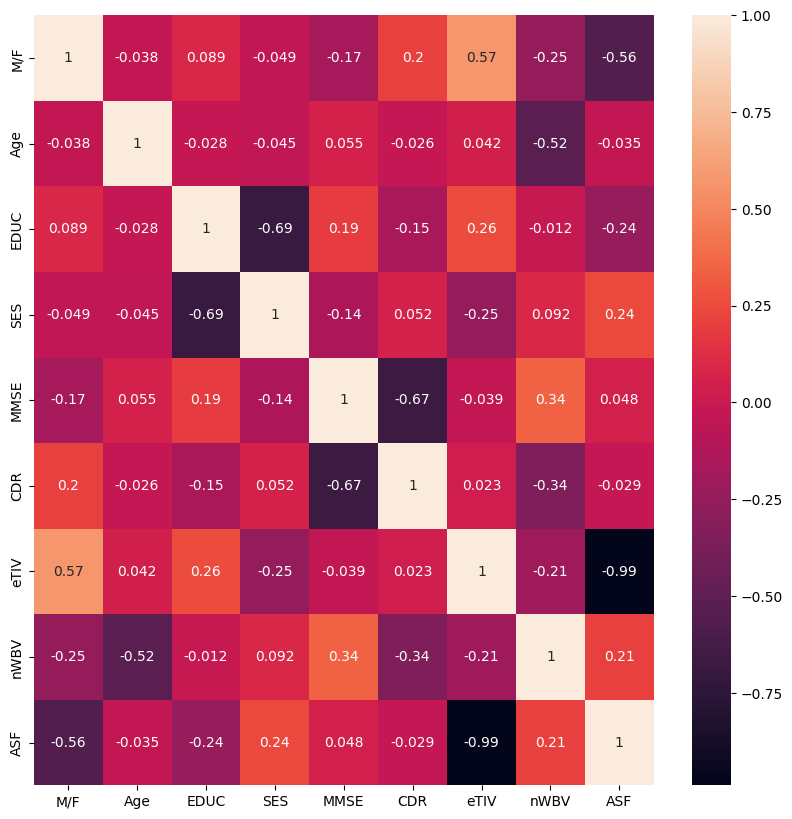

In [398]:
plt.figure(figsize = (10,10))
sns.heatmap(df[features].corr(),annot = True)

In [399]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.70)

In [400]:
X_train = train[features]
y_train = train['Group']
X_test = test[features]
y_test = test['Group']

In [401]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [402]:
model = RandomForestClassifier(n_estimators=150, max_depth =44)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=44, n_estimators=150)

In [403]:
model.score(X_test,y_test)

0.9083969465648855

In [404]:
y_pred = model.predict(X_test)

In [405]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  3,  13,  10],
       [  0,  99,   0],
       [  1,   0, 136]])

Text(95.72222222222221, 0.5, 'Truth')

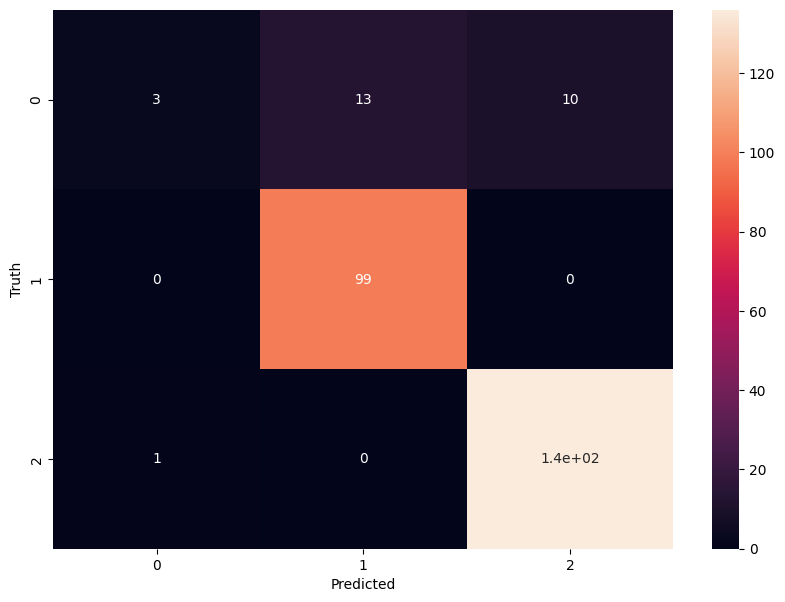

In [406]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [407]:

score = accuracy_score(y_test,y_pred)*100
acc = round(score,2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%,',corr,'correct detections')
print('Inaccuracy:', inac,'%,',len(test)-corr,'incorrectdetections')

Accuracy:  90.84 %, 238.0 correct detections
Inaccuracy: 9.16 %, 24.0 incorrectdetections


In [408]:

df.loc[0]

Group       2.000
M/F         1.000
Age        87.000
EDUC       14.000
SES         2.000
MMSE       27.000
CDR         0.000
eTIV     1987.000
nWBV        0.696
ASF         0.883
Name: 0, dtype: float64

In [409]:
input_data =(1, 87, 14, 2, 27, 0, 1987, 0, 0)
input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if prediction == [2]:
  print("Non Demented: The patient does not have Alzheimer's Disease")
elif prediction == [1]:
  print("Demented: The patient has Alzheimer's Disease")
else:
  print('The patient does not have Alzheimer')

Non Demented: The patient does not have Alzheimer's Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [410]:
 import pickle

In [411]:
filename = 'Alzheimer_model.sav'
pickle.dump(model,open(filename,'wb'))